# Credit Card Fraud Detection Project
This project analyzes a dataset of credit card transactions to build a model capable of detecting fraudulent transactions. The dataset contains the following features:
- **Time**: Time in seconds between the current and the first transaction.
- **V1-V28**: Principal components obtained via PCA (data has been anonymized).
- **Amount**: The transaction amount.
- **Class**: Target variable where 1 indicates fraud and 0 indicates non-fraud.

Given the unbalanced nature of the dataset, appropriate measures and metrics are used to evaluate the model's performance.


In [90]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd


In [88]:
# Load the dataset
data= pd.read_csv('creditcard.csv')

In [15]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [23]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [27]:
# distribution of legit transactions & fraudulent transactions
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [29]:
#separating the data for analysis
not_fraud = data[data.Class == 0]
fraud = data[data.Class == 1]
print(not_fraud.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [31]:
not_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [33]:
fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [37]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### *Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions*



In [41]:
not_fraud_sample = not_fraud.sample(n=492) #takes a random sample of 492 rows from the not_fraud DataFrame.
new_dataset = pd.concat([not_fraud_sample, fraud], axis=0)

In [43]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
38482,39409.0,-3.470568,3.512165,0.327413,-1.168426,0.247031,-0.384643,1.223770,-1.641749,2.951814,...,-0.164593,-1.056415,0.047689,-0.112614,0.533464,0.005287,1.024241,-0.088732,5.25,0
91587,63540.0,-1.686346,-0.549592,2.660831,0.288715,1.373174,0.988671,-0.717032,0.795131,0.216550,...,0.256920,0.722741,0.145733,-0.620070,-0.155315,-0.464869,0.164705,0.126732,9.99,0
120185,75738.0,-0.652039,0.303399,2.553878,-1.903449,-0.497703,-0.751499,0.426850,-0.119355,1.390901,...,-0.020789,0.222366,-0.395789,0.381027,0.459493,-0.801012,-0.058157,-0.147720,1.00,0
15597,26990.0,-2.347949,-0.036416,1.060555,0.191465,-1.006033,1.062828,-0.183908,-0.701528,-0.402614,...,0.379593,0.078284,-0.326575,-0.306043,-0.231371,-0.212479,-0.129213,-0.263319,158.00,0
186980,127335.0,0.105973,-0.674101,1.742936,-1.950710,-0.579111,0.395374,-0.767311,0.143072,-0.156455,...,0.603533,1.915128,0.090363,0.814618,-1.462431,-0.381091,0.152289,0.061040,18.00,0


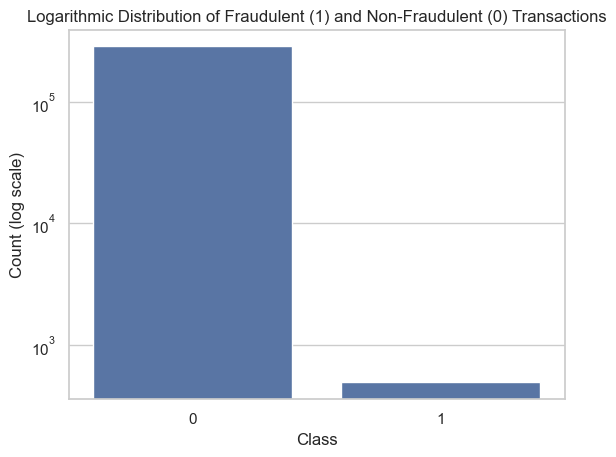

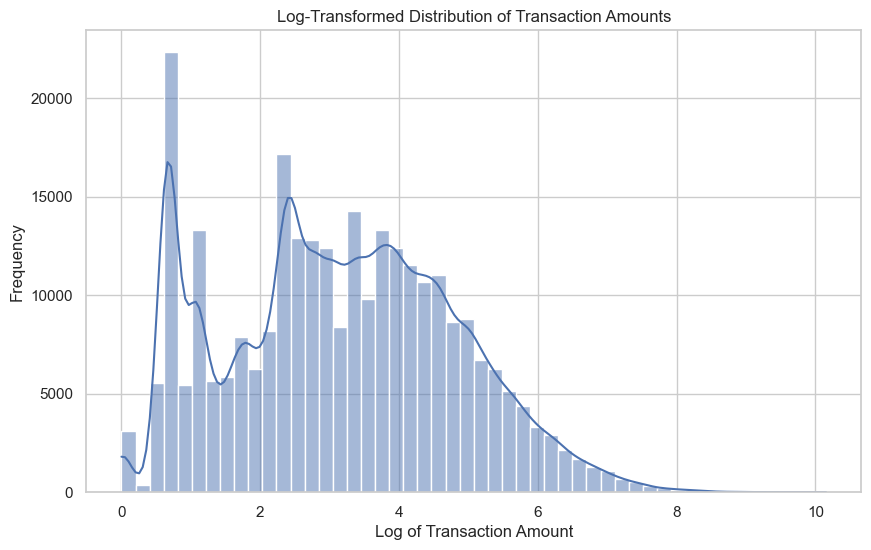

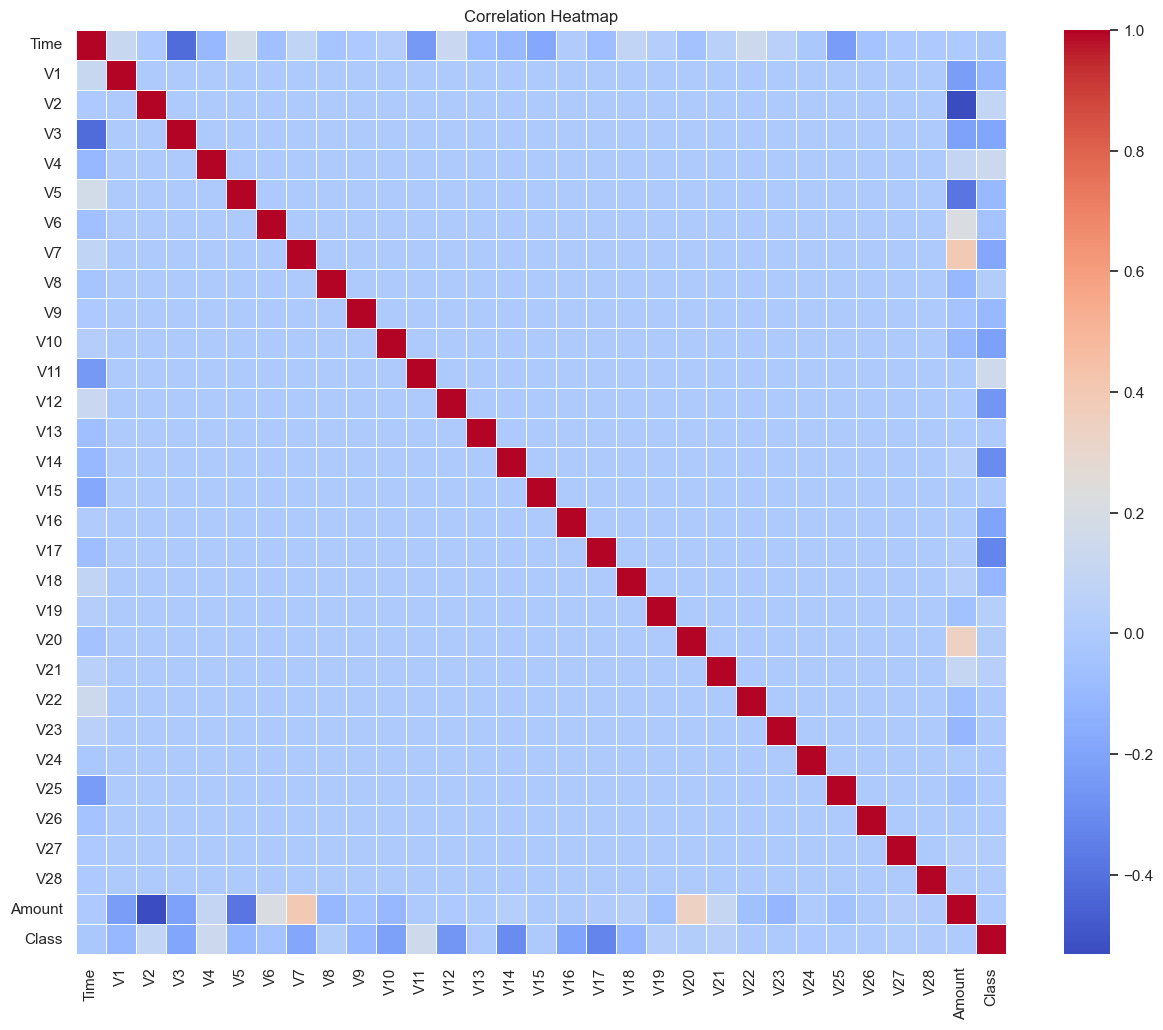

In [105]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Logarithmic Distribution of Fraudulent (1) and Non-Fraudulent (0) Transactions')
plt.xlabel('Class')
plt.ylabel('Count (log scale)')
plt.show()

# Log-transform the 'Amount' column for better visualization
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(data['Amount']), bins=50, kde=True)  # Use log1p to avoid log(0) issues
plt.title('Log-Transformed Distribution of Transaction Amounts')
plt.xlabel('Log of Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Display a heatmap to show correlations between features
plt.figure(figsize=(15, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



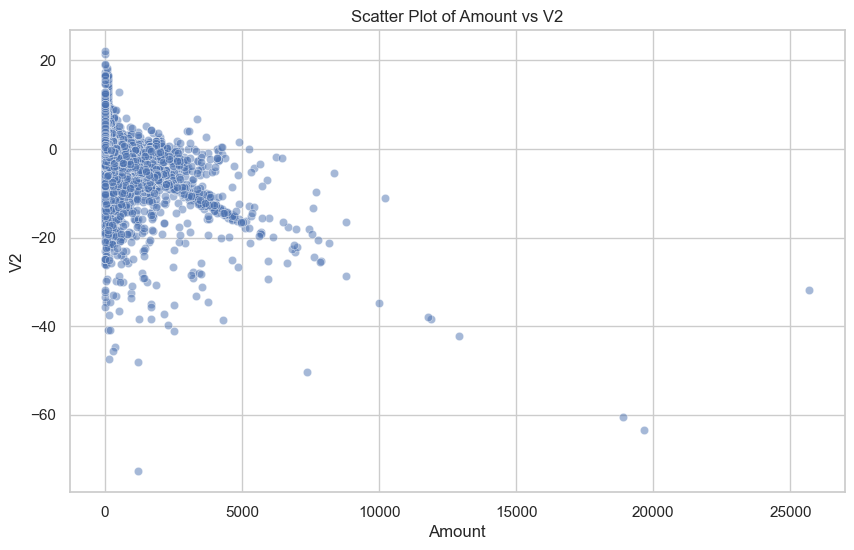

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Amount', y='V2', data=data, alpha=0.5)
plt.title('Scatter Plot of Amount vs V2')
plt.xlabel('Amount')
plt.ylabel('V2')
plt.show()


In [109]:
correlation = data['Amount'].corr(data['V2'])
print(f'Correlation between Amount and V2: {correlation:.2f}')


Correlation between Amount and V2: -0.53


In [45]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [47]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97409.729675,0.156986,-0.003877,-0.057353,-0.065268,0.077794,-0.014497,0.024647,0.070979,0.061225,...,-0.007901,-0.019445,0.012924,0.015209,0.005094,-0.012701,0.016825,0.003373,0.002176,78.106484
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [92]:
#  Split the data into features and target
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [53]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
38482    39409.0 -3.470568  3.512165  0.327413 -1.168426  0.247031 -0.384643   
91587    63540.0 -1.686346 -0.549592  2.660831  0.288715  1.373174  0.988671   
120185   75738.0 -0.652039  0.303399  2.553878 -1.903449 -0.497703 -0.751499   
15597    26990.0 -2.347949 -0.036416  1.060555  0.191465 -1.006033  1.062828   
186980  127335.0  0.105973 -0.674101  1.742936 -1.950710 -0.579111  0.395374   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [55]:
print(Y)

38482     0
91587     0
120185    0
15597     0
186980    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [57]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [59]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [96]:
#Scale the data using StandardScaler for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, Y_train)


LogisticRegression(max_iter=1000)

In [79]:

X_train_scaled_array = X_train_scaled.to_numpy() if isinstance(X_train_scaled, pd.DataFrame) else X_train_scaled
X_test_scaled_array = X_test_scaled.to_numpy() if isinstance(X_test_scaled, pd.DataFrame) else X_test_scaled

model.fit(X_train_scaled_array, Y_train)
Y_pred = model.predict(X_test_scaled_array)


# Calculate the accuracy on Training data

Y_train_pred = model.predict(X_train_scaled_array)

train_accuracy = accuracy_score(Y_train, Y_train_pred)


print('Accuracy on Training data:', train_accuracy)



Accuracy on Training data: 0.9504447268106735


In [83]:
# Calculate the accuracy on Test data
Y_test_pred = model.predict(X_test_scaled_array)

test_accuracy = accuracy_score(Y_test, Y_test_pred)

print('Accuracy on Test data:', test_accuracy)



Accuracy on Test data: 0.934010152284264


## Conclusion and Insights
The accuracy on the training data indicates how well the model fits the training set. A high training accuracy (e.g., above 90%) suggests that the model performs well on seen data, but it is also important to evaluate it on unseen (test) data to ensure it generalizes well and is not overfitting.

Further analysis such as precision-recall metrics and ROC curves are recommended, especially for unbalanced datasets like this, where simple accuracy may not fully reflect the model's ability to detect fraud.


 **Results**:
   - The model predicted the sample transaction as "Fraud."
   - The probability of this prediction was extremely high, with a `Probability of Fraud` close to 100%, indicating the model's strong confidence in its classification.

In [127]:

# Assuming X_train is a DataFrame on which the scaler was fitted
feature_names = X_train.columns  # Extracting feature names
new_data = np.array([[0, -2.3, 1.5, -1.2, 2.4, -0.5, 1.3, -0.8, 0.2, -1.0, 
                      0.3, 1.5, -0.7, 2.1, -0.2, 1.1, -0.4, 0.6, -1.5, 0.9, 
                      0.2, -0.9, 1.3, 0.5, -1.2, 0.4, -0.6, 0.7, 350.0, 100.0]]) 

# Create a DataFrame for the new data with the same feature names
new_data_df = pd.DataFrame(new_data, columns=feature_names)

# Scale the new data (using the same scaler as in training)
new_data_scaled = scaler.transform(new_data_df)

# Make predictions using the trained model
prediction = model.predict(new_data_scaled)

# Get prediction probabilities
prediction_proba = model.predict_proba(new_data_scaled)
print("Probability of Fraud:", prediction_proba[0][1])
print("Probability of Not Fraud:", prediction_proba[0][0])




Probability of Fraud: 0.9999999999954396
Probability of Not Fraud: 4.560352095950293e-12
